In [583]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import svm
from sklearn import neighbors
from sklearn.cluster import KMeans

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [584]:
df = pd.read_csv("/Users/nisarg/Downloads/EV_Market_segmentation/prepared_dataset/102_103_105_107_112.csv",thousands=',')
df2 = pd.read_csv("/Users/nisarg/Downloads/EV_Market_segmentation/prepared_dataset/104.csv",thousands=',')
# thousands to convert "100,000,33" comma seperated number to 10000033 a single int
df = df.drop('Sl. No',axis = 1)
df

,State,Two Wheelers,Three Wheelers,Passenger Cars,Buses,Total in state,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
0,Meghalaya,0,0,6,0,6,40.0,3.0,49.0,459001.0,10.0
1,Nagaland,23,0,1,0,24,NaN,2.0,58.0,339129.0,NaN
2,Manipur,35,5,12,0,52,NaN,1.0,586.0,499324.0,140.0
3,Tripura,73,0,8,0,81,NaN,3.0,9262.0,650026.0,750.0
4,Himachal Pradesh,0,0,98,0,98,10.0,13.0,1175.0,1964754.0,446.0
5,Goa,0,0,513,1,514,NaN,17.0,3870.0,1071570.0,614.0
6,Jharkhand,1039,16,655,0,1710,NaN,22.0,16811.0,6486937.0,1874.0
7,Assam,1607,117,151,0,1875,20.0,19.0,64766.0,4677053.0,827.0
8,Chandigarh,1526,0,974,0,2500,70.0,4.0,2812.0,746881.0,154.0
9,Bihar,2830,70,271,0,3171,37.0,26.0,83335.0,10407078.0,5255.0


In [585]:
df.columns

Index(['State', 'Two Wheelers', 'Three Wheelers', 'Passenger Cars', 'Buses',
       'Total in state', 'No. of EV Chargers Sanctioned',
       'No of RO's where EV Charging Facility available',
       'Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'Total EV supported by state for adoption and manufacturing'],
      dtype='object')

### Splitting the dataset

- 1st - Type of vehicles (two wheelers , three wheelers , passenger cars , buses and total in state )
- 2nd - Rest of them ( more broader categories )

In [586]:
df_subset = df[['State', 'No. of EV Chargers Sanctioned',
       "No of RO's where EV Charging Facility available",
       'Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'Total EV supported by state for adoption and manufacturing']]
df_subset_type = df[['State', 'Two Wheelers', 'Three Wheelers', 'Passenger Cars','Total in state']]
df_subset.head()

,State,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
0,Meghalaya,40.0,3.0,49.0,459001.0,10.0
1,Nagaland,NaN,2.0,58.0,339129.0,NaN
2,Manipur,NaN,1.0,586.0,499324.0,140.0
3,Tripura,NaN,3.0,9262.0,650026.0,750.0
4,Himachal Pradesh,10.0,13.0,1175.0,1964754.0,446.0


In [587]:
df_subset_type.head()

,State,Two Wheelers,Three Wheelers,Passenger Cars,Total in state
0,Meghalaya,0,0,6,6
1,Nagaland,23,0,1,24
2,Manipur,35,5,12,52
3,Tripura,73,0,8,81
4,Himachal Pradesh,0,0,98,98


In [588]:
df2

,Category,Segment,2013-14,2014-15
0,Passenger Vehicles (PVs),Passenger Cars,2519281.0,2590917.0
1,Passenger Vehicles (PVs),Multi-Utility Vehicles,568692.0,629255.0
2,Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),3087973.0,3220172.0
3,Commercial Vehicles - M & HCVs,Passenger Carriers,41175.0,49360.0
4,Commercial Vehicles - M & HCVs,Goods Carriers,180381.0,219193.0
5,Commercial Vehicles - M & HCVs,Total M & HCVs,221556.0,268553.0
6,Commercial Vehicles - LCVs,Passenger Carriers,45136.0,46569.0
7,Commercial Vehicles - LCVs,Goods Carriers,432343.0,381961.0
8,Commercial Vehicles - LCVs,Total LCVs,477479.0,428530.0
9,Commercial Vehicles (CVs),Total Commercial Vehicles (CVs),699035.0,697083.0


In [589]:
df_subset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   State                                                       26 non-null     object 
 1   No. of EV Chargers Sanctioned                               20 non-null     float64
 2   No of RO's where EV Charging Facility available             25 non-null     float64
 3   Total Electric Vehicle                                      23 non-null     float64
 4   Total Non-Electric Vehicle                                  23 non-null     float64
 5   Total EV supported by state for adoption and manufacturing  25 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.3+ KB


### Missing values

In [590]:
df_subset.isna().sum()

State                                                         0
No. of EV Chargers Sanctioned                                 6
No of RO's where EV Charging Facility available               1
Total Electric Vehicle                                        3
Total Non-Electric Vehicle                                    3
Total EV supported by state for adoption and manufacturing    1
dtype: int64

### Lets examine the dataset in Two phases

1. Govt support 
    - No. of EV chargers Sanctioned
    - Total EV supported by state for adoption and manufacturing
2. Public data
    - Total Electric Vehicle
    - Total Non-Electric Vehicle
    - No of RO's where EV Charging Facility available

In [591]:
df_subset[df['No. of EV Chargers Sanctioned'].isna()]

,State,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
1,Nagaland,NaN,2.0,58.0,339129.0,NaN
2,Manipur,NaN,1.0,586.0,499324.0,140.0
3,Tripura,NaN,3.0,9262.0,650026.0,750.0
5,Goa,NaN,17.0,3870.0,1071570.0,614.0
6,Jharkhand,NaN,22.0,16811.0,6486937.0,1874.0
13,Punjab,NaN,41.0,14804.0,12463019.0,2977.0


In [592]:
df_subset[df['Total EV supported by state for adoption and manufacturing'].isna()]

,State,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
1,Nagaland,NaN,2.0,58.0,339129.0,NaN


<b> The reason of NaN values in above two fields might be that theres no policies regarding the EV chargers or EV support , so it will be appropriate if we fill all NaNs here with 0.

In [593]:
df_subset['No. of EV Chargers Sanctioned'] = df_subset['No. of EV Chargers Sanctioned'].fillna(0)
df_subset['Total EV supported by state for adoption and manufacturing'] = df_subset['Total EV supported by state for adoption and manufacturing'].fillna(0)

/var/folders/4j/_ythdyc10c14y246dzp2mj4m0000gn/T/ipykernel_60243/3463724593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4j/_ythdyc10c14y246dzp2mj4m0000gn/T/ipykernel_60243/3463724593.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [594]:
df_subset.isna().sum()

State                                                         0
No. of EV Chargers Sanctioned                                 0
No of RO's where EV Charging Facility available               1
Total Electric Vehicle                                        3
Total Non-Electric Vehicle                                    3
Total EV supported by state for adoption and manufacturing    0
dtype: int64

In [595]:
df_subset[df["No of RO's where EV Charging Facility available"].isna()]

,State,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
25,Maharashtra,317.0,NaN,116646.0,31058990.0,20955.0


In [596]:
df_subset["No of RO's where EV Charging Facility available"] = df_subset["No of RO's where EV Charging Facility available"].fillna(90)

/var/folders/4j/_ythdyc10c14y246dzp2mj4m0000gn/T/ipykernel_60243/1242122970.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [597]:
df_subset[["No of RO's where EV Charging Facility available","State"]]

,No of RO's where EV Charging Facility available,State
0,3.0,Meghalaya
1,2.0,Nagaland
2,1.0,Manipur
3,3.0,Tripura
4,13.0,Himachal Pradesh
5,17.0,Goa
6,22.0,Jharkhand
7,19.0,Assam
8,4.0,Chandigarh
9,26.0,Bihar


In [598]:
df_subset[df['Total Non-Electric Vehicle'].isna()]

,State,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
12,Madhya Pradesh,235.0,167.0,NaN,NaN,6306.0
14,Telangana,138.0,112.0,NaN,NaN,6316.0
15,Andhra Pradesh,266.0,65.0,NaN,NaN,6393.0


In [599]:
df_subset[df["Total Electric Vehicle"].isna()]

,State,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
12,Madhya Pradesh,235.0,167.0,NaN,NaN,6306.0
14,Telangana,138.0,112.0,NaN,NaN,6316.0
15,Andhra Pradesh,266.0,65.0,NaN,NaN,6393.0


There big states are missing values , this has to be a error or no data available for the same.

We will try to find the data from the net
                       Electric      Non-Electric
    Telangana       -   46937          15066192
    Madhya Pradesh  -   NA              NA
    Andhra pradesh  -   NA              NA
for the rest we won't consider MP and AP for further analyses by creating a subset and removing them.

In [600]:
df_state_wise_subset = df_subset.set_index("State")

In [601]:
df_state_wise_subset

,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
State,,,,,
Meghalaya,40.0,3.0,49.0,459001.0,10.0
Nagaland,0.0,2.0,58.0,339129.0,0.0
Manipur,0.0,1.0,586.0,499324.0,140.0
Tripura,0.0,3.0,9262.0,650026.0,750.0
Himachal Pradesh,10.0,13.0,1175.0,1964754.0,446.0
Goa,0.0,17.0,3870.0,1071570.0,614.0
Jharkhand,0.0,22.0,16811.0,6486937.0,1874.0
Assam,20.0,19.0,64766.0,4677053.0,827.0
Chandigarh,70.0,4.0,2812.0,746881.0,154.0


In [602]:
df_state_wise_subset.loc["Telangana",["Total Electric Vehicle","Total Non-Electric Vehicle"]] = [46937,15066192]

In [603]:
df_state_wise_subset.loc['Telangana']

No. of EV Chargers Sanctioned                                      138.0
No of RO's where EV Charging Facility available                    112.0
Total Electric Vehicle                                           46937.0
Total Non-Electric Vehicle                                    15066192.0
Total EV supported by state for adoption and manufacturing        6316.0
Name: Telangana, dtype: float64

In [604]:
df_state_wise_subset.columns

Index(['No. of EV Chargers Sanctioned',
       'No of RO's where EV Charging Facility available',
       'Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'Total EV supported by state for adoption and manufacturing'],
      dtype='object')

In [605]:
df_charging_subset = df_state_wise_subset[["No. of EV Chargers Sanctioned","No of RO's where EV Charging Facility available"]]
df_charging_subset

,No. of EV Chargers Sanctioned,No of RO's where EV Charging Facility available
State,,
Meghalaya,40.0,3.0
Nagaland,0.0,2.0
Manipur,0.0,1.0
Tripura,0.0,3.0
Himachal Pradesh,10.0,13.0
Goa,0.0,17.0
Jharkhand,0.0,22.0
Assam,20.0,19.0
Chandigarh,70.0,4.0


In [606]:
df_ev_sale_subset = df_state_wise_subset[['Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'Total EV supported by state for adoption and manufacturing']]
df_ev_sale_subset.drop(['Andhra Pradesh','Madhya Pradesh'],axis = 0,inplace = True)
df_ev_sale_subset

/var/folders/4j/_ythdyc10c14y246dzp2mj4m0000gn/T/ipykernel_60243/2366790060.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total Electric Vehicle,Total Non-Electric Vehicle,Total EV supported by state for adoption and manufacturing
State,,,
Meghalaya,49.0,459001.0,10.0
Nagaland,58.0,339129.0,0.0
Manipur,586.0,499324.0,140.0
Tripura,9262.0,650026.0,750.0
Himachal Pradesh,1175.0,1964754.0,446.0
Goa,3870.0,1071570.0,614.0
Jharkhand,16811.0,6486937.0,1874.0
Assam,64766.0,4677053.0,827.0
Chandigarh,2812.0,746881.0,154.0


In [607]:
df_state_wise_subset['Total Electric Vehicle'] = df_state_wise_subset['Total Electric Vehicle'].fillna(83335)

df_state_wise_subset['Total Non-Electric Vehicle'] = df_state_wise_subset['Total Non-Electric Vehicle'].fillna(10407078)

## Performing EDA
final dfs :

 - df_ev_sale_subset
 - df_charging_subset
 - df_state_wise_subset    { contains null value filled as 83335 based on bihars value }

In [608]:
!pip install chart_studio

In [609]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as pgo
import glob

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [610]:
def plot_pie(dataset:pd.DataFrame,column:str):
    fig = px.pie(df_ev_sale_subset, values=df_ev_sale_subset[column], names=df_ev_sale_subset.index,
                 color_discrete_sequence=pal_)
    fig.update_layout(width = 700, height = 700,
                      margin = dict(t=0, l=0, r=0, b=0))
    fig.update_traces(textfont_size=16)
    fig.show()

In [611]:
plot_pie(df_ev_sale_subset,"Total Electric Vehicle")

In [612]:
plot_pie(df_ev_sale_subset,"Total Non-Electric Vehicle")

In [613]:
plot_pie(df_ev_sale_subset,"Total EV supported by state for adoption and manufacturing")

In [614]:
pca = PCA(n_components=2)

In [615]:
def do_pca_and_plot(data : pd.DataFrame) -> np.ndarray:
    standard_ev_sale_subset = StandardScaler().fit_transform(data)
    principalComponents = pca.fit_transform(standard_ev_sale_subset)
    principal_df_ev_sale_subset = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    principal_df_ev_sale_subset.set_index(data.index)
    
    fig = px.scatter(principal_df_ev_sale_subset, color=data.index)

    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    features = data.columns

    for i, feature in enumerate(features):
        fig.add_annotation(
            ax=0, ay=0,
            axref="x", ayref="y",
            x=loadings[i, 0],
            y=loadings[i, 1],
            showarrow=True,
            arrowsize=2,
            arrowhead=2,
            xanchor="right",
            yanchor="top"
        )
        fig.add_annotation(
            x=loadings[i, 0],
            y=loadings[i, 1],
            ax=0, ay=0,
            xanchor="center",
            yanchor="bottom",
            text=feature,
            yshift=5,
        )

    fig.show()
    return principalComponents

In [616]:
do_pca_and_plot(df_ev_sale_subset)
do_pca_and_plot(df_charging_subset)
do_pca_and_plot(df_state_wise_subset)

print("done")

done


## Segmentation 


In [617]:
data = do_pca_and_plot(df_state_wise_subset)

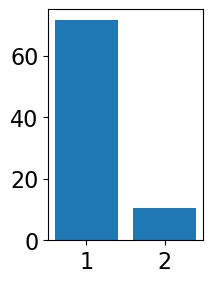

In [618]:
plt.figure(figsize=(2,3))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

In [619]:
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters = i, init = "k-means++")
  model.fit(df_state_wise_subset)
  wcss.append(model.inertia_)

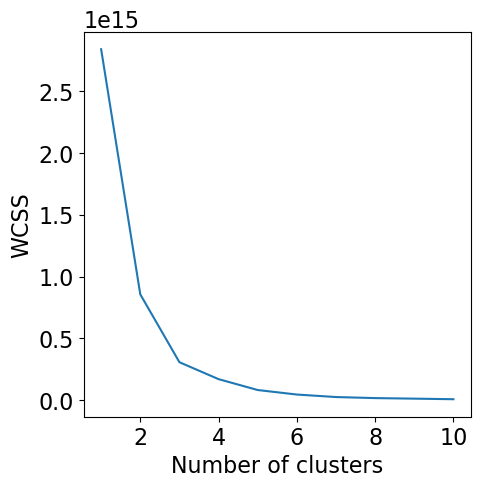

In [620]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [621]:
model1 = KMeans(n_clusters = 3, init = "k-means++")
label = model1.fit_predict(data)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 2 1 1 2 1 1 2 1 2]


In [670]:
text = df_state_wise_subset.index
tx = list(text)

In [678]:
data[label == 1 , 0]

array([ 1.53270715,  0.65575019,  0.78993361,  0.19251622,  0.01996463,
        2.2070892 ,  0.63808565, -0.04557914,  1.25438768])

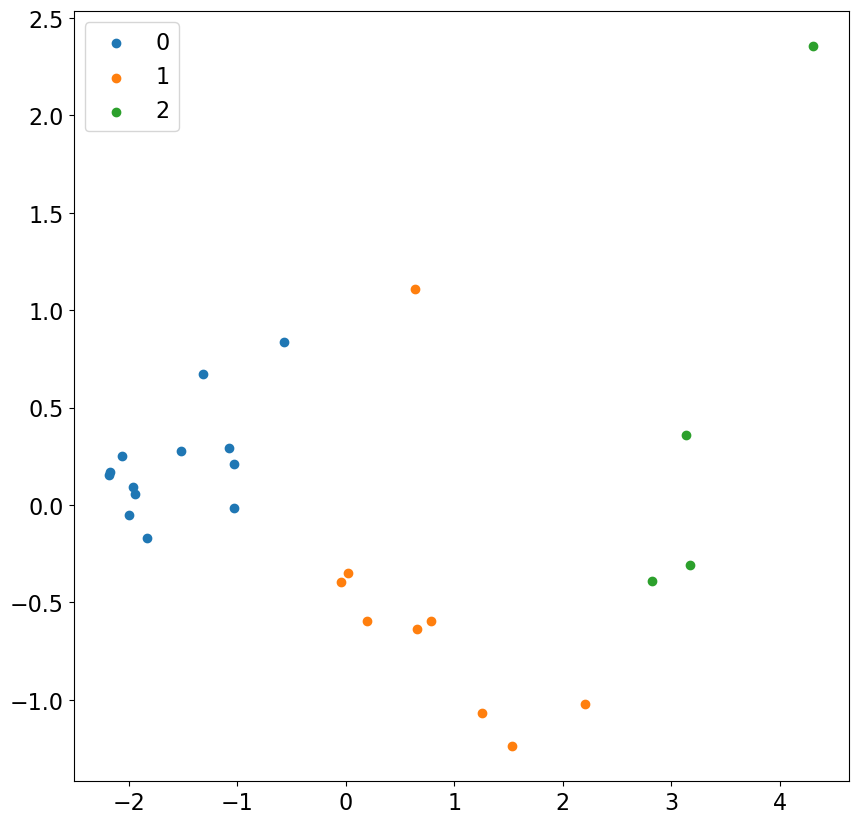

In [689]:
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)

plt.legend()
plt.show()

In [684]:
def cluster(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_state_wise_subset)
    Z = kmeans.predict(df_state_wise_subset)
    return kmeans, Z

In [673]:
max_clusters = len(df_state_wise_subset)

In [634]:
inertias = np.zeros(max_clusters)

for i in range(1, max_clusters):
    kmeans, Z = cluster(i)
    inertias[i] = kmeans.inertia_

In [635]:
n_clusters = 3
model, Z = cluster(n_clusters)

In [716]:
# Represent neighborhoods as in previous bubble chart, adding cluster information under color.
trace0 = pgo.Scatter(x=data[:,0],
                     y=data[:,1],
                     text=df_state_wise_subset.index,
                     textposition="top center",
                     mode='markers+text',
                     marker=pgo.Marker(size=df_state_wise_subset['Total Electric Vehicle'],
                                       sizemode='diameter',
                                       sizeref=df_state_wise_subset['Total Electric Vehicle'].max()/50,
                                       opacity=0.5,
                                       color=Z)
)


data7 = pgo.Data([trace0])
layout7 = pgo.Layout(title='EV',
                     xaxis=pgo.XAxis(showgrid=False,
                                     zeroline=False,
                                     showticklabels=False),
                     yaxis=pgo.YAxis(showgrid=False,
                                     zeroline=False,
                                     showticklabels=False)
)

layout7['title'] = 'State EV (PCA and k-means clustering with 3 clusters)'
fig7 = pgo.Figure(data=data7, layout=layout7)

In [717]:
fig7.show()